## Population coding

Figure 3

### Data creation

In [69]:
import secorder as sec
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os

path = os.getcwd() + '\\figures\\'

In [3]:
def smooth_data(nt, tau, scale):
    x = scale*np.random.randn(nt+100)
    x_int = np.cumsum(x)
    y = np.convolve(x_int, np.exp(-np.linspace(0,3,tau)), 'same')[:nt]
    return y
  
tcurve = lambda mu,sig: stats.norm.pdf(mu,scale=sig.reshape(-1,1))*sig.reshape(-1,1)

def pop_data(data):
    popd = scales.reshape(-1,1)*tcurve((data.reshape(1,-1)-means.reshape(-1,1)+0.5)%1-0.5, widths)
    popd = popd + noises.reshape(-1,1)*np.random.randn(*popd.shape)
    return popd
  
def tuning_curve(tau, vel, ww):
    data = smooth_data(10000, tau, vel)
    pop_tune = pop_data(data)
  
    dum, ys, dum, dum, dum = sec.run_multiple(pop_tune.T, 
                       w0=ww, eta_adam=0., ny=ww.shape[1], with_rec = False, 
                       nt=pop_tune.shape[1], mb = 1,
                       permute = False, wrec_fac = 0.)
  
    return data%1,ys

plots

In [5]:
def pop_pipeline():
    global data, popd, ws, ys, tcx, tcy, wrec
    data = smooth_data(nd, tau, vel)
    popd = pop_data(data)

    popd -= popd.mean(1).reshape(-1,1)
    
    ws, ys, wrec, hdw, dum = sec.run_multiple(popd.T, ny=ny, 
                  with_rec = with_rec,
                  eta_adam=eta_adam, nt=nt, pos_w=pos_w,
                eta_rec = eta_rec, w_rec = w_rec, wrec_fac=wrec_fac,
                w_decay=w_decay, rule=rule)
    print("wrec:", wrec.min())
    
    tcx, tcy = tuning_curve(tau, vel, ws[-1])

def plot_noise(cc = None):
    global mms, sss, infos, nbins, bb
    cmap = plt.get_cmap("tab10")

    mms = []
    sss = []
    infos = []

    for iy,yy in enumerate(tcy.T):

        nbins = 50
        n, bb = np.histogram(tcx, bins=nbins)
        sy, _ = np.histogram(tcx, bins=nbins, weights=yy)
        sy2, _ = np.histogram(tcx, bins=nbins, weights=yy*yy)
        mm = sy / n
        ss = np.sqrt(sy2/n - mm*mm)

        if cc is not None:
            color = cc
        else:
            color = cmap(iy%10)
        plt.plot(bb[:-1],mm,color=color)
        plt.fill_between(bb[:-1], mm - 2*ss, mm + 2*ss,color=color, alpha=0.15);

        deriv2 = ((mm[1:]-mm[:-1])/(bb[1]-bb[0]))**2
        ssm = ((ss[1:]**2)+(ss[:-1]**2))/2
        inf = deriv2/(ssm+1e-10)

        mms.append(mm)
        sss.append(ss)
        infos.append(inf)

    mms = np.array(mms)
    sss = np.array(sss)
    infos = np.array(infos)

def plot_all(choose=0):
    plt.figure(1)
    plt.plot(popd[:,0]);
    plt.plot(popd[:,400]);
    
    plt.figure(2)
    plt.subplot(311)
    plt.plot(ws[5,:nn,0]);
    # plt.plot(means,ws[5,nn:,0]);
    plt.plot(ws[20,:nn,0]);
    # plt.plot(means,ws[20,nn:,0]);
    plt.plot(ws[nt//400,:nn,0]);
    # plt.plot(means,ws[nt//400,nn:,0]);
    plt.grid();
    plt.subplot(312)
    plt.plot(ws[nt//200,:nn,0]);
    # plt.plot(means,ws[nt//200,nn:,0]);
    plt.grid();
    plt.subplot(313)
    plt.plot(ws[-1,:nn,0]);
    # plt.plot(means,ws[-1,nn:,0],'.-');
    plt.grid();
    
    plt.figure(3)
    plt.subplot(311)
    plt.plot(ws[500,:,:]);
    plt.subplot(312)
    plt.plot(ws[nt//200,:,:]);
    plt.subplot(313)
    plt.plot(ws[-1,:,:]);
    
    plt.figure(4)
    plot_noise()
  
    plt.figure(5)
    xs = np.linspace(0,1,300)
    for i in range(nn):
        plt.plot(xs,np.sign(ws[-1,i,choose])*scales[i]*tcurve(xs-means[i], np.array(widths[i])).flatten(),
            lw=noises[i]*20, alpha=np.clip(np.abs(ws[-1,i,choose]/ws[-1,:,choose].max())-0.05,0,1), c='r');
    
    # plt.plot(tcx, tcy,'.')

In [6]:
nn = 100
spacing = 1./nn
width = 0.05
noise = 0.2

nd = 1000
tau = 30
vel = 0.002

In [12]:
means = np.arange(0,spacing*nn,spacing)
widths = width*np.ones(nn)
scales = np.ones(1)
noises = noise*np.ones(1)

In [ ]:
means = np.arange(0,spacing*nn,spacing)
widths = width*np.ones(nn)
scales = np.ones(1)
noises = noise*np.ones(1)

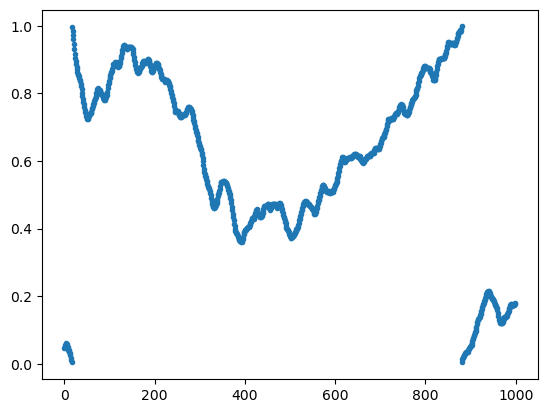

In [7]:
d = smooth_data(nd, tau, vel)
plt.plot(d%1,'.');

Fig 1 a - theta(t)

In [14]:
nn = 100
spacing = 1./nn
width = 0.05
noise = 0.01

In [15]:
means = np.arange(0,spacing*nn,spacing)
widths = width*np.ones(nn)
scales = np.ones(1)
noises = noise*np.ones(1)

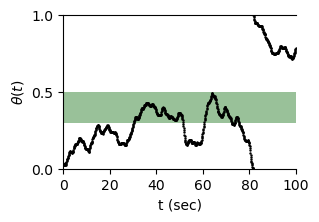

In [17]:
fig,ax = plt.subplots(1,1,figsize=(3,2))

np.random.seed(10)

dd = smooth_data(nd, tau, vel)

rec = plt.Rectangle((0,0.3),100,0.2, facecolor="darkgreen", 
                     edgecolor="none", alpha=0.4)
ax.add_patch(rec)

plt.plot(np.arange(0,100,0.1),dd%1,'k.',ms=1.5,);
plt.xlim(0,100)
plt.ylim(0,1)
plt.yticks([0,0.5,1])
plt.xlabel("t (sec)")
plt.ylabel(r"$\theta (t)$")

ax.spines['right'].set_visible(False)

In [9]:
fig.savefig(path + 'fig_pop_theta.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

Plot input tuning curves

([], [])

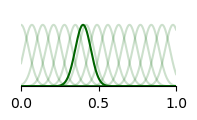

In [18]:
fig,ax = plt.subplots(1,1,figsize=(2,1.))

xs = np.linspace(0,1,300)
    
for i in np.arange(0,nn,7):
    plt.plot(xs,scales[0]*tcurve(xs-means[i], np.array(widths[i])).flatten(), c='darkgreen',alpha=0.2)

i = 40
plt.plot(xs,scales[0]*tcurve(xs-means[i], np.array(widths[i])).flatten(), c='darkgreen');
# plt.plot(xs,scales[0]*tcurve(xs-means[i], np.array(widths[i])).flatten(), c='darkgreen',alpha=0.2);

plt.xlim(0,1)
plt.ylim(0,0.5)

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])
    
# plt.xlabel("t (sec)")


In [19]:
fig.savefig(path + 'fig_pop_input_tuning.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

Plot input x(t)

In [20]:
popd = pop_data(dd)

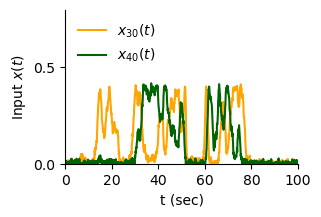

In [21]:
fig,ax = plt.subplots(1,1,figsize=(3,2))

plt.plot(np.arange(0,100,0.1),popd[30],c='orange');
plt.plot(np.arange(0,100,0.1),popd[40],c='darkgreen');
plt.legend([r"$x_{30}(t)$", r"$x_{40}(t)$"], loc='upper left', frameon=False)

plt.xlim(0,100)
plt.ylim(0,0.8)
plt.yticks([0,0.5])
plt.xlabel("t (sec)")
plt.ylabel(r"Input $x(t)$")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [22]:
fig.savefig(path + 'fig_pop_input_t.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

correlation plot

In [23]:
data = smooth_data(100000, tau, vel)
popd = pop_data(data)

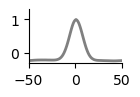

In [24]:
fig,ax = plt.subplots(1,1,figsize=(1.2,0.7))
plt.plot(np.arange(-nn//2+1,nn//2+1),np.corrcoef(popd)[nn//2],
        c='gray',lw=2);
plt.xlim(-50,50)
plt.ylim(-0.3,1.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [25]:
fig.savefig(path + 'fig_pop_correlation.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

### Learn multiple units

In [29]:
nn = 100
spacing = 1./nn
width = 0.05

nd = 100000
tau = 30
vel = 0.002

noise = 0.01 # 

In [30]:
means = np.arange(0,spacing*nn,spacing)
widths = width*np.ones(nn)
scales = np.ones(nn)
noises = noise*np.ones(nn)

In [31]:
nt = 10*100000
ny = 16

rule = 'bcm+wd'

eta_adam = 0.003
w_decay = 0.001
pos_w = False

with_rec = True
eta_rec = 0.03
w_rec = -0.
wrec_fac = 1.

In [32]:
np.random.seed(1)

res = pop_pipeline();

nbs: 10000


100%|██████████| 9999/9999 [01:02<00:00, 159.92it/s]


wrec: -0.8105046567231918
nbs: 10000


100%|██████████| 9999/9999 [00:03<00:00, 2513.68it/s]


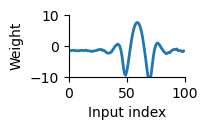

In [33]:
fig,ax = plt.subplots(1,1,figsize=(1.5,0.8))

plt.plot(np.arange(100),ws[-1,:,0],c='tab:blue', lw=2);

plt.xlim(0,100)
plt.ylim(-10,10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([0,50,100])
    
plt.ylabel(r"Weight")
plt.xlabel(r"Input index");

In [34]:
fig.savefig(path + 'fig_pop_weights.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

Text(0.5, 0, '$\\theta$')

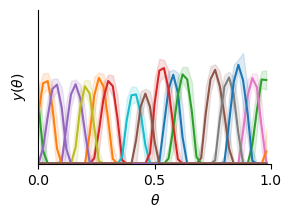

In [35]:
fig,ax = plt.subplots(1,1,figsize=(3,2))

plot_noise()

plt.xlim(0,1)
plt.ylim(0,24)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])
plt.xticks([0,0.5,1])
    
plt.ylabel(r"$y(\theta)$")
plt.xlabel(r"$\theta$")

In [36]:
fig.savefig(path + 'fig_pop_tuning.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

### Fisher info

In [37]:
def noise_corr():
    global sigxy, nbins
    
    sigxy = []

    for iy1,yy1 in enumerate(tcy.T):
        for iy2,yy2 in enumerate(tcy.T):
            # if iy > 2:
                # break
            nbins = 50
            n, bb = np.histogram(tcx, bins=nbins)
            sy1, _ = np.histogram(tcx, bins=nbins, weights=yy1)
            sy2, _ = np.histogram(tcx, bins=nbins, weights=yy2)
            mm1 = sy1 / n
            mm2 = sy2 / n

            sxy, _ = np.histogram(tcx, bins=nbins, weights=yy1*yy2)
            sxy = sxy / n
            sxy = sxy - mm1*mm2

            sigxy.append(sxy)

    sigxy = np.array(sigxy).reshape(ny,ny,nbins)


def info2(delta, diag=False):
    global infos2

    noise_corr()

    infos2 = []

    for ib in range(nbins-delta):

        inds1 = mms[:,ib] > 0.1
        inds2 = mms[:,ib+delta] > 0.1
        # print(ib, np.where(inds)[0])
        inds = inds1 | inds2

        mmi = mms[inds]

        sigxyi1 = sigxy[inds][:,inds][:,:,ib]
        sigxyi2 = sigxy[inds][:,inds][:,:,ib+delta]
        sigxyim = (sigxyi1 + sigxyi2)/2
        # print(sigxyim)

        if diag:
            sigxyim = np.diag(np.diag(sigxyim))

        siginv = np.linalg.inv(sigxyim)

        deriv = ((mmi[:,delta:]-mmi[:,:-delta])/(bb[delta]-bb[0]))[:,ib]

        inf = deriv @ siginv @ deriv.T

        infos2.append(inf)
    
    infos2 = np.array(infos2).flatten()
    

In [400]:
delta = 1
info2(delta, diag=False)

In [285]:
noise_corr()

### tuning width

In [39]:
def tuning_width(xs, ys):
  widths = []
  for iy, yy in enumerate(ys):
    nbins = np.linspace(0,1,201)
    n, xx = np.histogram(xs, bins=nbins)
    sy, _ = np.histogram(xs, bins=nbins, weights=yy)
    mm = sy / n
    
    maxy = mm.max()
    thresy = maxy/2
    ix = np.where(mm>=thresy)[0]
    
    hwidth = len(ix)*nbins[1]
    
    widths += [hwidth]
    
  return np.array(widths)

In [40]:
tuning_width(tcx,tcy.T)

array([0.07 , 0.075, 0.07 , 0.075, 0.075, 0.08 , 0.075, 0.075, 0.07 ,
       0.075, 0.075, 0.07 , 0.075, 0.08 , 0.075, 0.07 ])

In [41]:
np.mean(tuning_width(tcx,tcy.T))

0.0740625

In [43]:
np.mean(tuning_width(data%1,popd))

0.11

### Control

In [44]:
rule = 'ltp+wd'

nt = 10*100000

eta_adam = 0.001
w_decay = 0.1
pos_w = False

with_rec = True
eta_rec = 0.03
w_rec = -0.
wrec_fac = 20.

In [45]:
np.random.seed(2)
res = pop_pipeline();

nbs: 10000


100%|██████████| 9999/9999 [00:57<00:00, 173.40it/s]


wrec: -0.25105957119564365
nbs: 10000


100%|██████████| 9999/9999 [00:04<00:00, 2313.16it/s]


Text(0.5, 0, 'Input index')

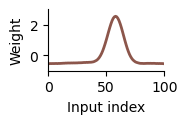

In [46]:
fig,ax = plt.subplots(1,1,figsize=(1.5,0.8))

plt.plot(np.arange(100),ws[-1,:,4],c='tab:brown',lw=2);

plt.xlim(0,100)
plt.ylim(-1,3)

# ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.yticks([])
plt.xticks([0,50,100])
    
plt.ylabel(r"Weight")
plt.xlabel(r"Input index")

In [47]:
fig.savefig(path + 'fig_pop_control_weights.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

Text(0.5, 0, '$\\theta$')

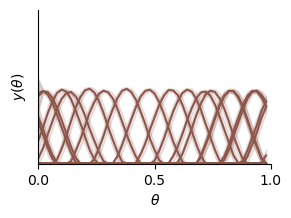

In [48]:
fig,ax = plt.subplots(1,1,figsize=(3,2))

plot_noise('tab:brown')

plt.xlim(0,1)
plt.ylim(0,20)

# ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])
plt.xticks([0,0.5,1])
    
plt.ylabel(r"$y(\theta)$")
plt.xlabel(r"$\theta$")

In [49]:
fig.savefig(path + 'fig_pop_control_tuning.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

In [51]:
delta = 1

info2(delta)

In [ ]:
tuning_width(tcx,tcy.T)

array([0.17 , 0.17 , 0.165, 0.17 , 0.165, 0.165, 0.165, 0.17 , 0.165,
       0.165, 0.165, 0.165, 0.165, 0.16 , 0.17 , 0.165])

In [ ]:
np.mean(tuning_width(tcx,tcy.T))

0.16625

Inference

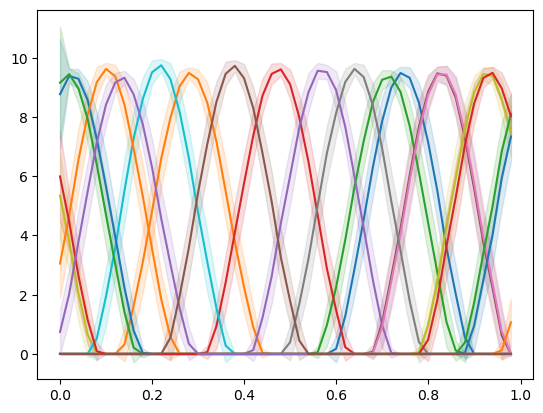

In [ ]:
plot_noise()

In [392]:
info2(delta)

### Diverse tuning curves (scale, noise, width)

In [54]:
nn = 100
# nn2 = nn//2

width = 0.05
spacing = 1./nn
noise = 0.01

np.random.seed(1)

means = np.arange(0,spacing*nn,spacing)
widths = width*np.random.lognormal(mean=0,sigma=0.1,size=nn)

scales = np.random.lognormal(mean=0,sigma=0.2,size=nn)
noises = noise*np.random.lognormal(mean=0,sigma=0.2,size=nn)

nd = 100000
tau = 30
vel = 0.002

([], [])

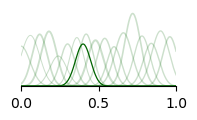

In [55]:
fig,ax = plt.subplots(1,1,figsize=(2,1.))

xs = np.linspace(0,1,300)
    
for i in np.arange(0,nn,6):
    plt.plot(xs,scales[i]*tcurve(xs-means[i], np.array(widths[i])).flatten(), c='darkgreen',alpha=0.2,
            lw=1*noises[i]*100)

i = 40
plt.plot(xs,scales[i]*tcurve(xs-means[i], np.array(widths[i])).flatten(), c='darkgreen',lw=1*noises[i]*100);

plt.xlim(0,1)
plt.ylim(0,0.7)

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])

In [56]:
fig.savefig(path + 'fig_pop_input_tuning_varied.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

In [57]:
rule = 'bcm+wd'

nt = 5*100000
ny = 16

eta_adam = 0.003
pos_w = False
w_decay=0.001

with_rec = True
eta_rec = 0.03
w_rec = -0.
wrec_fac = 1.# .1

In [58]:
np.random.seed(1)
res = pop_pipeline();

nbs: 5000


100%|██████████| 4999/4999 [00:44<00:00, 111.48it/s]


wrec: -1.6265062414578435
nbs: 10000


100%|██████████| 9999/9999 [00:06<00:00, 1540.70it/s]


Correlation plot for input data

Text(0.5, 0, '$\\theta$')

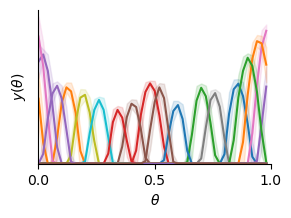

In [59]:
fig,ax = plt.subplots(1,1,figsize=(3,2))

plot_noise()

plt.xlim(0,1)
plt.ylim(0,25)

# ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])
plt.xticks([0,0.5,1])
    
plt.ylabel(r"$y(\theta)$")
plt.xlabel(r"$\theta$")

In [60]:
fig.savefig(path + 'fig_pop_tuning_varied.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

In [61]:
tuning_width(tcx,tcy.T)

array([0.085, 0.085, 0.075, 0.09 , 0.09 , 0.075, 0.1  , 0.075, 0.075,
       0.075, 0.07 , 0.105, 0.095, 0.07 , 0.085, 0.075])

In [62]:
np.mean(tuning_width(tcx,tcy.T)) # tuning width output

0.08281250000000001

In [64]:
np.mean(tuning_width(data%1,popd)) # tuning width input

0.10825

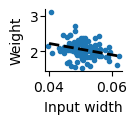

In [65]:
fig8,ax = plt.subplots(1,1,figsize=(1.,0.8))

plt.plot(widths,np.abs(ws[-1]).mean(1),'.',c='tab:blue')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([2.,3.],["2","3"])
plt.xticks([0.04,0.06])
    
plt.xlabel(r"Input width")
plt.ylabel(r"Weight")

ax.tick_params(axis='y', which='major', pad=1)

rho = stats.pearsonr(widths,np.abs(ws[-1]).mean(1))

slope, intercept, r_value, p_value, std_err = stats.linregress(widths, np.abs(ws[-1]).mean(1))

plt.plot([0.04,0.062],[0.04*slope+intercept,0.062*slope+intercept],'k--',lw=2);

In [66]:
fig8.savefig(path + 'fig_pop_cinv_tuning_varied_rho.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

In [70]:
stats.pearsonr(widths,np.abs(ws[-1]).mean(1))

PearsonRResult(statistic=-0.2809784463289222, pvalue=0.004629519154726905)

In [63]:
info2(1)
infos.sum(axis=0).mean(), infos2.mean()

(50934.94490845709, 32971.07509884442)

### LTP only control

In [71]:
rule = 'ltp+wd'

nt = 10*100000
ny = 16

eta_adam = 0.001
w_decay=0.1
pos_w = False

with_rec = True
eta_rec = 0.03
w_rec = -0.
wrec_fac = 20.

In [72]:
np.random.seed(2)
res = pop_pipeline();

nbs: 10000


100%|██████████| 9999/9999 [00:58<00:00, 171.34it/s]


wrec: -0.3358674086252733
nbs: 10000


100%|██████████| 9999/9999 [00:04<00:00, 2212.29it/s]


Text(0.5, 0, '$\\theta$')

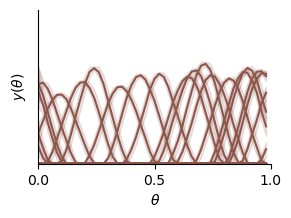

In [73]:
fig,ax = plt.subplots(1,1,figsize=(3,2))

plot_noise('tab:brown')

plt.xlim(0,1)
plt.ylim(0,20)

# ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([])
plt.xticks([0,0.5,1])
    
plt.ylabel(r"$y(\theta)$")
plt.xlabel(r"$\theta$")

In [74]:
fig.savefig(path + 'fig_pop_control_tuning_varied.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

In [75]:
tuning_width(tcx,tcy.T)

array([0.17 , 0.165, 0.17 , 0.155, 0.175, 0.165, 0.16 , 0.16 , 0.165,
       0.155, 0.165, 0.16 , 0.17 , 0.16 , 0.17 , 0.17 ])

In [76]:
np.mean(tuning_width(tcx,tcy.T)) # tuning width output

0.16468750000000001

In [137]:
np.mean(tuning_width(data%1,popd)) # tuning width input

0.10800000000000001

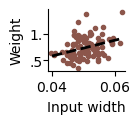

In [77]:
fig9,ax = plt.subplots(1,1,figsize=(1.,0.8))

plt.plot(widths,np.abs(ws[-1]).mean(1),'.',c='tab:brown')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([0.5,1.],[".5","1."])
plt.xticks([0.04,0.06])
    
plt.xlabel(r"Input width")
plt.ylabel(r"Weight")

ax.tick_params(axis='y', which='major', pad=0)

rho = stats.pearsonr(widths,np.abs(ws[-1]).mean(1))

slope, intercept, r_value, p_value, std_err = stats.linregress(widths, np.abs(ws[-1]).mean(1))

plt.plot([0.04,0.062],[0.04*slope+intercept,0.062*slope+intercept],'k--',lw=2);

In [78]:
fig9.savefig(path + 'fig_pop_control_tuning_varied_rho.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

In [79]:
stats.pearsonr(widths,np.abs(ws[-1]).mean(1))

PearsonRResult(statistic=0.33745581072356307, pvalue=0.0005960084499642671)

In [80]:
info2(1)
infos.sum(axis=0).mean(), infos2.mean()

(121582.21190695856, 38287.97924935414)